In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

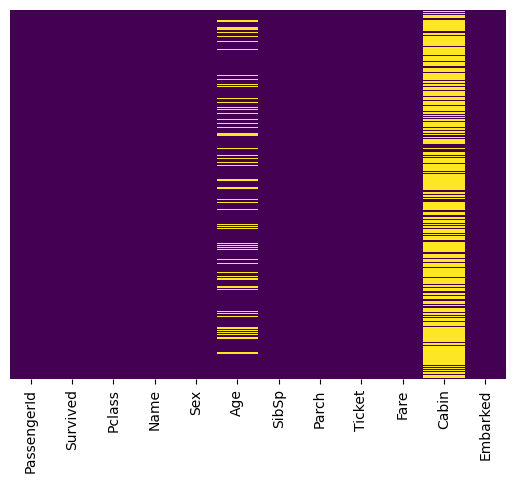

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False ,cmap = 'viridis')

In [6]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

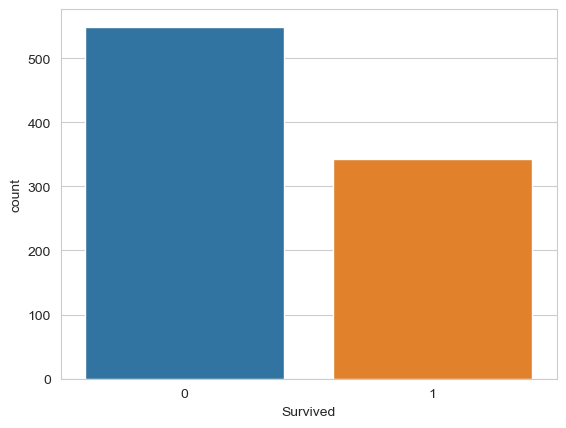

In [7]:
sns.countplot(x ='Survived' , data = train)

<Axes: xlabel='Survived', ylabel='count'>

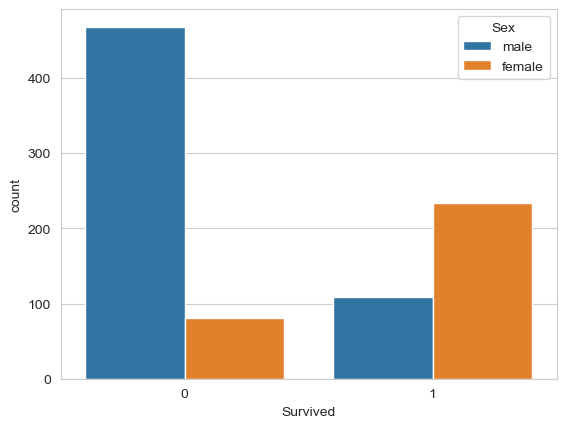

In [9]:
sns.countplot(x ='Survived' , hue = 'Sex' , data = train)

<Axes: xlabel='Survived', ylabel='count'>

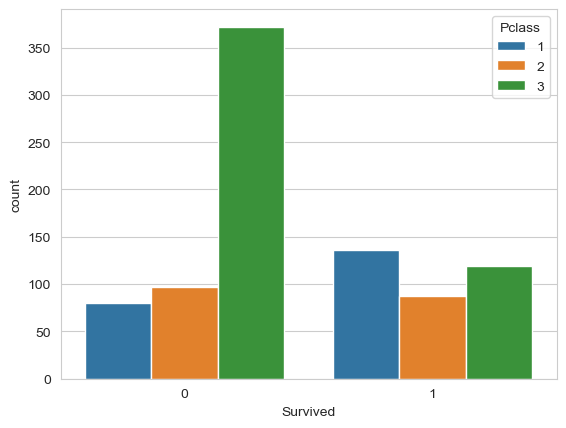

In [10]:
sns.countplot(x ='Survived' , hue = 'Pclass', data = train)

C:\Users\Vaibhav Jadhav\AppData\Local\Temp\ipykernel_23536\371096065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna() , kde = False , bins = 30)


<Axes: xlabel='Age'>

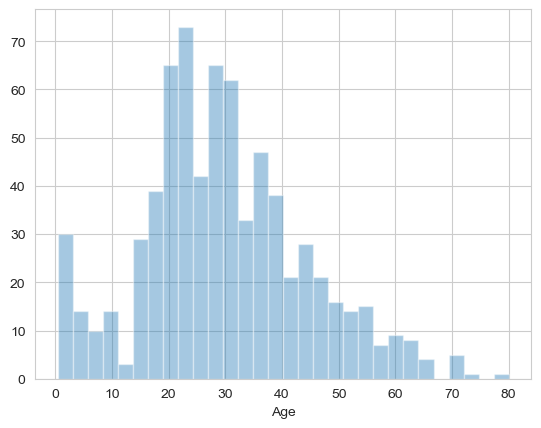

In [11]:
sns.distplot(train['Age'].dropna() , kde = False , bins = 30)

<Axes: ylabel='Frequency'>

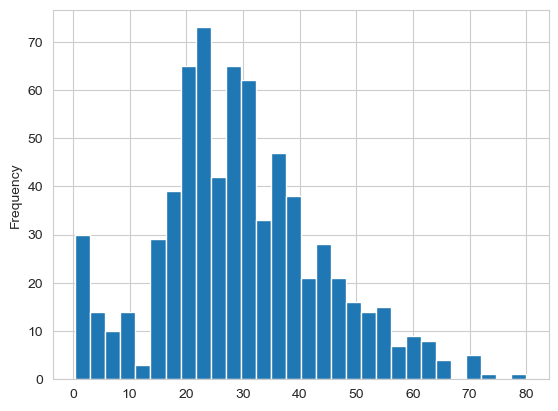

In [15]:
train['Age'].plot.hist(bins = 30)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

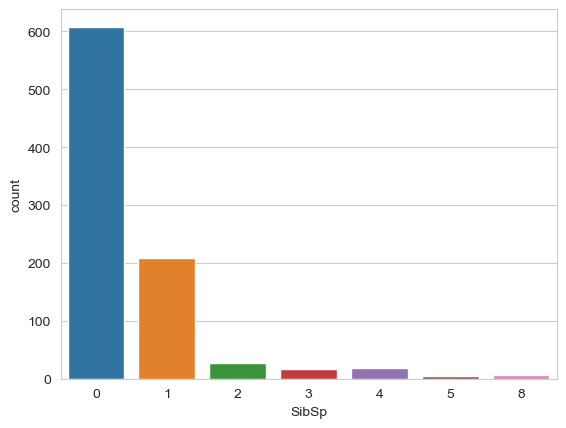

In [17]:
sns.countplot(x = 'SibSp' , data = train)

<Axes: >

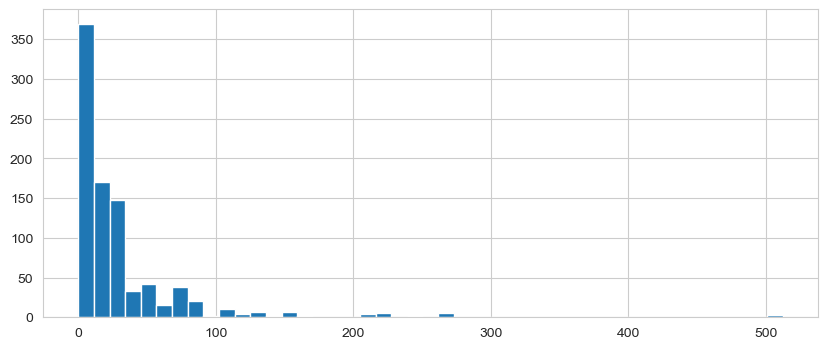

In [21]:
train['Fare'].hist(bins = 45 , figsize=(10,4))

In [22]:
import cufflinks as cf

C:\Users\Vaibhav Jadhav\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [23]:
cf.go_offline()

In [24]:
train['Fare'].iplot(kind = 'hist' , bins = 30)

<Axes: xlabel='Pclass', ylabel='Age'>

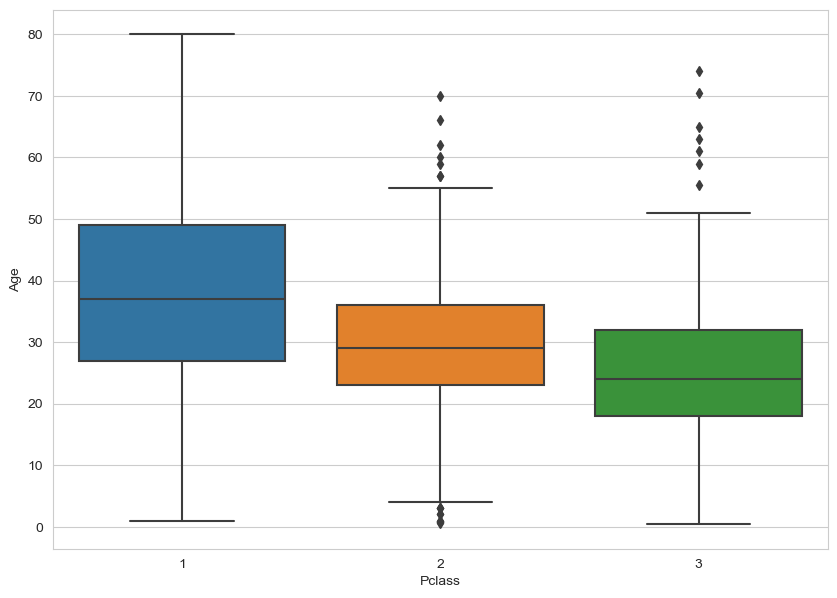

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train)

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [34]:
train['Age'] = train[['Age' , 'Pclass']].apply(impute_age , axis = 1)

<Axes: >

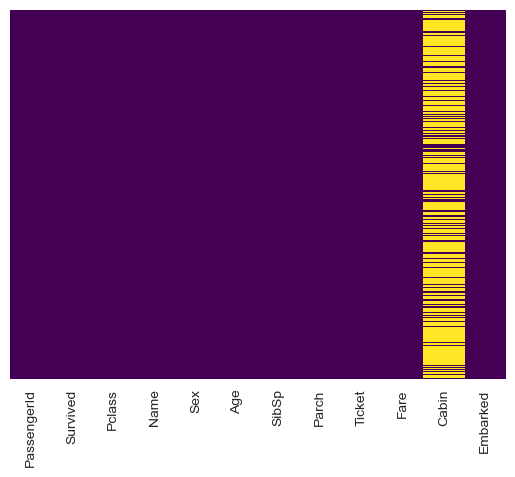

In [36]:
sns.heatmap(train.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')

In [37]:
train.drop('Cabin' , axis = 1 , inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
train.dropna(inplace = True)

<Axes: >

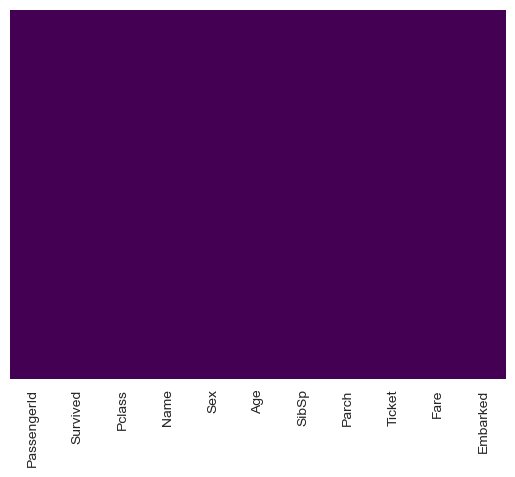

In [40]:
sns.heatmap(train.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')

In [44]:
sex = pd.get_dummies(train['Sex'] , drop_first=True)

In [45]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [46]:
embark = pd.get_dummies(train['Embarked'] , drop_first=True)

In [47]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [48]:
train = pd.concat([train , sex , embark] , axis=1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [51]:
train.drop(['Sex' , 'Embarked' , 'Name' , 'Ticket'] , axis = 1 , inplace = True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [53]:
train.drop('PassengerId' , axis = 1 , inplace = True)

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [56]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [59]:
from sklearn.model_selection import train_test_split



In [62]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logModel = LogisticRegression()

In [66]:
logModel.fit(X_train , y_train)

C:\Users\Vaibhav Jadhav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [67]:
prediction = logModel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       174
           1       0.83      0.68      0.74       120

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test , prediction)

array([[157,  17],
       [ 39,  81]], dtype=int64)